In [3]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
import math
#import seaborn as sns
from sklearn import linear_model
from numbers import Number
import statsmodels.formula.api as smf

row_data = pd.read_csv('./dataset/Video_Game_Sales_as_of_Jan_2017.csv', usecols=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'])
row_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


## Prepare data

In [11]:
# Years in dataset
# min(prepared_data.Year_of_Release) # 1985
# max(prepared_data.Year_of_Release) # 2016

genres = ['Sports', 'Platform', 'Racing', 'Role-Playing',
          'Puzzle', 'Misc','Shooter', 'Simulation', 'Action',
          'Fighting', 'Adventure','Strategy']

def get_decade(row):
    return int(math.floor(row['Year_of_Release'] / 10.0)) * 10

def has_numbers(row):
    if bool(re.search(r'\d', row['Name'])):
        return 1
    else:
        return 0

def label_genres(row,genre):
    if(row['Genre'] == genre):
        return 1
    else:
        return 0
    
def get_filtered_data(data):
    #remove all null columns
    prepared_data = data.dropna()
    #add Decade column
    prepared_data = prepared_data.copy()
    prepared_data['Decade'] = prepared_data.apply(get_decade,axis=1)
    #add Sequel column
    prepared_data['Sequel'] = prepared_data.apply(has_numbers,axis=1)
    
    for genre in genres:
        prepared_data[genre] = prepared_data.apply(lambda row: label_genres(row,genre), axis=1)
    
    
    return prepared_data

## Linear Regression - EU sales

In [10]:
data = get_filtered_data(row_data)

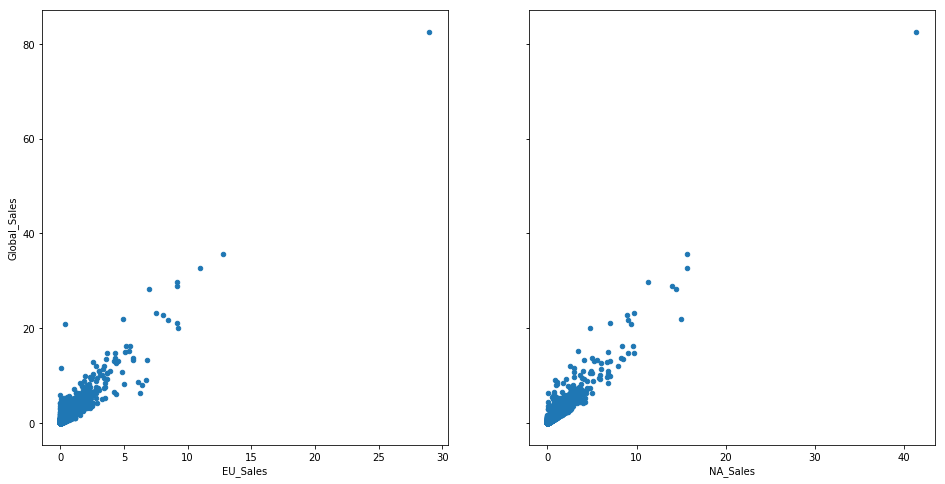

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='EU_Sales', y='Global_Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='NA_Sales', y='Global_Sales', ax=axs[1], figsize=(16, 8))

In [23]:
# fig, axs = plt.subplots(1, 2, sharey=True)
# data.plot(kind='scatter', x='Critic_Score', y='Global_Sales', ax=axs[0], figsize=(16, 8))
# data.plot(kind='scatter', x='Year_of_Release', y='Global_Sales', ax=axs[1], figsize=(16, 8))

In [25]:
lm = smf.ols(formula='Global_Sales ~ EU_Sales', data=data).fit()
lm.params

Intercept    0.143806
EU_Sales     2.672699
dtype: float64

In [42]:
# zvysenie predajov v EU o 1 sa prejavy v globalych o 2.67
# y = B0 + B1*x
# y = 0.143806 + 2.672699*X

Pri predajoch 150 v EU sa vo svete preda podla regresie: 401.048656

In [44]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'EU_Sales': [150]})
lm.predict(X_new)

array([ 401.04860518])

## Visualize prediction

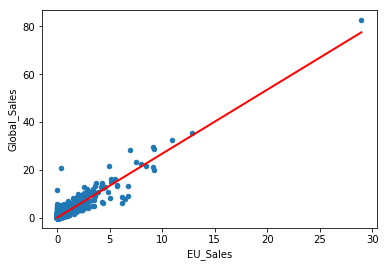

In [47]:
X_new = pd.DataFrame({'EU_Sales': [data.EU_Sales.min(), data.EU_Sales.max()]})
# data
data.plot(kind='scatter', x='EU_Sales', y='Global_Sales')
# Regresion
plt.plot(X_new, lm.predict(X_new), c='red', linewidth=2)

In [48]:
lm.conf_int()

,0,1
Intercept,0.127373,0.160240
EU_Sales,2.649831,2.695566


In [50]:
lm.rsquared

0.8807092812040076

Pomocou R<sup>2</sup> koeficientu je možné zistiť,<br>
na koľko je presná regresia. Respektíve, je to štatistická metrika,<br>
zobrazujúca, ako sú dáta blízko k regresnej funkcii.<br>
Podľa predajov z Európy je možné predikovať globálne predaje s presnesťou <b>88%</b>.

## Linear Regression - added variables

In [119]:
genres = ['Sports', 'Platform', 'Racing', 'Role-Playing',
          'Puzzle', 'Misc','Shooter', 'Simulation', 'Action',
          'Fighting', 'Adventure','Strategy']

In [134]:
lm = smf.ols(formula='Global_Sales ~ EU_Sales + Sports + Platform + Racing + Puzzle + Misc + Shooter + Simulation + Action + Fighting + Adventure + Strategy', data=data).fit()
lm.params

Intercept     0.250789
EU_Sales      2.671659
Sports       -0.066474
Platform     -0.033716
Racing       -0.191480
Puzzle       -0.129928
Misc         -0.003679
Shooter      -0.114814
Simulation   -0.180553
Action       -0.151198
Fighting     -0.022415
Adventure    -0.196970
Strategy     -0.242420
dtype: float64

In [135]:
lm.rsquared

0.8820670033641097

In [136]:
lm.pvalues

Intercept     2.619365e-24
EU_Sales      0.000000e+00
Sports        4.049542e-02
Platform      4.102807e-01
Racing        1.731993e-07
Puzzle        4.219400e-02
Misc          9.291621e-01
Shooter       5.220764e-04
Simulation    5.954683e-05
Action        2.643878e-07
Fighting      5.899616e-01
Adventure     4.120527e-05
Strategy      1.421593e-07
dtype: float64